In [1]:
# csv 파일 주소
large_data_csv_url = './csv_data/0503_large_data.csv'
small_data_csv_url = './csv_data/0503_small_data.csv'

# split train_ds, validation_ds, test_ds

In [2]:
import pandas as pd

In [3]:
data_pd = pd.read_csv(large_data_csv_url)

data_pd.head(20)

,Unnamed: 0,Sentence,Emotion
0,0,언니 동생으로 부르는게 맞는 일인가요..??,걱정
1,1,그냥 내 느낌일뿐겠지?,걱정
2,2,아직너무초기라서 그런거죠?,걱정
3,3,유치원버스 사고 낫다던데,걱정
4,4,근데 원래이런거맞나요,걱정
5,5,남자친구가 떠날까봐요,걱정
6,6,이거 했는데 허리가 아플수도 있나요? ;;,걱정
7,7,내가불안해서꾸는걸까..,걱정
8,8,일주일도 안 남았당...ㅠㅠ,걱정
9,9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,걱정


In [4]:
# Data 컬럼, 데이터 shape 조회
data_pd.columns, data_pd.shape

(Index(['Unnamed: 0', 'Sentence', 'Emotion'], dtype='object'), (28335, 3))

## 데이터를 무작위로 섞고, 컬럼명을 변경해준다

In [5]:
# 컬럼 명 변경
data_pd = data_pd.rename(columns={'Sentence': 'sentence', 'Emotion': 'label'})

# Unnamed 컬럼 제거
data_pd = data_pd.drop('Unnamed: 0', axis=1)

# 데이터를 무작위로 섞어준다
shuffled_data = data_pd.sample(frac=1)
shuffled_data.head(20)

,sentence,label
13665,세상엔 미친사람이 참 많다,분노
22325,너무 너무 좋아요!!,행복
16210,일단 총기부터 다 수거해라~,분노
10908,솔직히 관심없지만... 10년 지났다고 ??? 진짜 빠르네,설렘
13361,회사보다 욕을 더 많이 먹는 이상한 현대차 노조,분노
18385,야식이 문제에용 ㅠㅠ,슬픔
10672,애플이 또 마이웨이로! 근데 음질서 인정 받으면 다른 제조사서 분명 벤치마킹함,설렘
15591,융통성 전혀 없는 기득권층을 싹 다 조져버려야됨,분노
8462,지금 화나야 9승 무패 하겟다는거야???,설렘
9551,이 색히 들이 한국 축구의 미래라니...,설렘


In [6]:
from transformers import AutoModelForSequenceClassification
from tokenization_kobert import KoBertTokenizer

model = AutoModelForSequenceClassification.from_pretrained('monologg/distilkobert')
tokenizer = KoBertTokenizer.from_pretrained('monologg/distilkobert')

/home/elicer/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

In [7]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
# extract labels
id2label = {}
label2id = {}

for i, label in enumerate(shuffled_data.label.unique()):
    id2label[i] = label
    label2id[label] = i

In [9]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, df, label2id):
        self.data = df.values
        self.label2id = label2id
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        result = self.data[idx, 0]
        result = tokenizer(result, truncation=True, return_token_type_ids=False)
        label = self.data[idx, -1]
        label = self.label2id[label]
        result['label'] = label
        
        return result

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, SubsetRandomSampler
import random

# pandas 데이터를 train, validation, test로 나눈다 (약 8:1:1 비율로 생성)
train_df, validation_df = train_test_split(shuffled_data, test_size=0.1, random_state=42)

# Dataset 생성
train_ds, validation_ds = CustomDataset(train_df, label2id), CustomDataset(validation_df, label2id)

train_ds.__getitem__(0), validation_ds.__getitem__(0)

({'input_ids': [2, 3969, 7003, 7096, 5330, 784, 6463, 5330, 6844, 1683, 7096, 2196, 6554, 5377, 6844, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 0},
 {'input_ids': [2, 1185, 5425, 671, 329, 316, 7096, 6886, 46, 1201, 1641, 7828, 2753, 5782, 54, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 1})

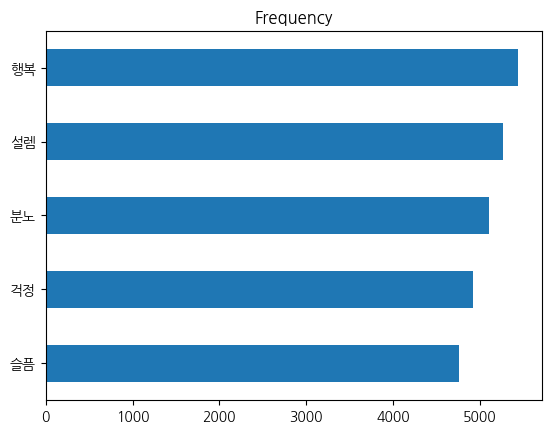

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

train_df['label'].value_counts(ascending=True).plot.barh()
plt.title('Frequency')
plt.show()

In [12]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding='longest')

2023-05-03 08:46:08.306485: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-03 08:46:08.352941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 08:46:09.638361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# Evalate
import evaluate

accuracy = evaluate.load('accuracy')

In [14]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, labels=labels)

In [15]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "monologg/distilkobert", num_labels=len(id2label), id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.b

In [16]:
model.config

DistilBertConfig {
  "_name_or_path": "monologg/distilkobert",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "\ubd84\ub178",
    "1": "\ud589\ubcf5",
    "2": "\uc124\ub818",
    "3": "\uc2ac\ud514",
    "4": "\uac71\uc815"
  },
  "initializer_range": 0.02,
  "label2id": {
    "\uac71\uc815": 4,
    "\ubd84\ub178": 0,
    "\uc124\ub818": 2,
    "\uc2ac\ud514": 3,
    "\ud589\ubcf5": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 3,
  "pad_token_id": 1,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.28.1",
  "vocab_size": 8002
}

In [17]:
import numpy as np

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=30,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_strategy="steps",
    eval_steps=1000, 
    save_steps=1000,
    save_total_limit=10,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=validation_ds,
#    tokenizer=tokenizer,
    data_collator=data_collator,
    # compute_metrics=compute_metrics,
)

trainer.train()

/home/elicer/.local/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.928100,0.907054
2000,0.790500,0.888770
3000,0.766800,0.853877
4000,0.639700,0.892415
5000,0.601700,0.944284
6000,0.552800,0.971075
7000,0.442400,1.047080
8000,0.463600,1.062313
9000,0.363400,1.219823
10000,0.303300,1.267353


TrainOutput(global_step=47820, training_loss=0.2033528541830582, metrics={'train_runtime': 2577.5337, 'train_samples_per_second': 296.807, 'train_steps_per_second': 18.553, 'total_flos': 3499586112181074.0, 'train_loss': 0.2033528541830582, 'epoch': 30.0})

In [26]:
import transformers

transformers.__version__

'4.28.1'

In [27]:
tokenizer("동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세 무궁화 삼천리 화려강산 대한사람 대한으로 길이 보전하세")

{'input_ids': [2, 1741, 7848, 6241, 5468, 2298, 5907, 6516, 7096, 1907, 6113, 5439, 517, 0, 5861, 4924, 5757, 5778, 7096, 2355, 7005, 7782, 6493, 3503, 1931, 6579, 2095, 5521, 7941, 2650, 7422, 6122, 5112, 6060, 5350, 6516, 1682, 6498, 1682, 7078, 1315, 7096, 2355, 7207, 7782, 6579, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [28]:
from transformers import pipeline

# 파이프라인 가져올 때 model은 사용중인 model을 주면 댐
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [29]:
yhat = trainer.predict(validation_ds)
print(yhat)

PredictionOutput(predictions=array([[-1.2809967 ,  3.6790671 ,  0.9832602 , -1.5688157 , -2.123395  ],
       [ 0.03402498, -1.9387466 ,  0.20443292, -0.5621677 ,  2.0138688 ],
       [-0.62504804,  4.954041  , -0.4894142 , -1.3548497 , -2.5089657 ],
       ...,
       [-0.39135134, -1.7518071 , -1.6600356 ,  3.3496454 ,  0.4000396 ],
       [-0.76353097, -2.518071  ,  0.5273149 ,  1.8723494 ,  1.0068396 ],
       [-1.0244613 , -0.3568666 ,  2.5443645 , -1.0372616 , -0.17795065]],
      dtype=float32), label_ids=array([1, 4, 1, ..., 3, 3, 2]), metrics={'test_loss': 0.8538766503334045, 'test_runtime': 2.8963, 'test_samples_per_second': 978.48, 'test_steps_per_second': 61.457})


In [30]:
predictions = yhat[0]
labels = yhat[1]
predictions = np.argmax(predictions, axis=1)

accuracy.compute(predictions=predictions, references=labels)

{'accuracy': 0.6792519407198306}

In [31]:
# 오차행렬 생성
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [32]:
validation_ds[1]["label"]

4

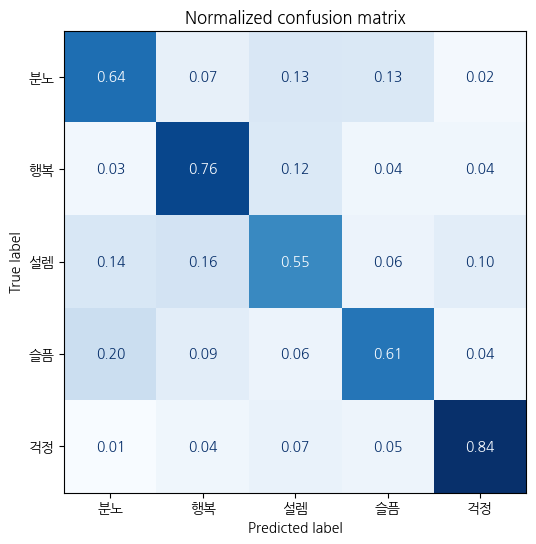

In [33]:
# 답안지
y_valid = [data["label"] for data in validation_ds]
y_valid = [id2label[label] for label in y_valid]

# 예측치
y_preds = [id2label[label] for label in predictions]

# labels
labels = label2id.keys()

plot_confusion_matrix(y_preds, y_valid, labels)